### Objective: To build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data of legendary Titanic ship. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("./Downloads/train.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

## Data preprocessing

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.Age.agg(['mean','median'])

mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [7]:
df['Age'].fillna(df['Age'].median(), inplace = True)

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [10]:
df = df.dropna(subset = ['Embarked'])

In [11]:
df = df.drop(['Name','Cabin','Ticket', 'PassengerId'], axis=1)

In [12]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [13]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
# Data Visualisation
import seaborn as sns

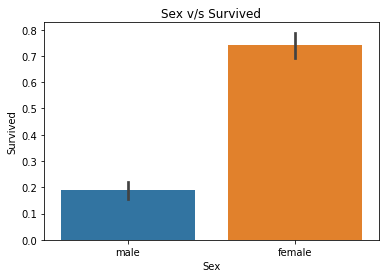

In [15]:
ax = sns.barplot(x='Sex', y='Survived', data=df)
ax.set_title('Sex v/s Survived')
ax

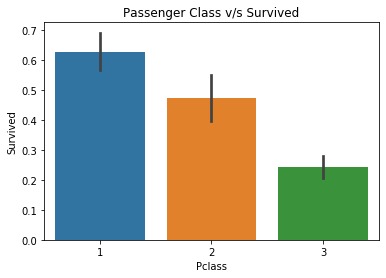

In [16]:
ax1 = sns.barplot(x='Pclass', y='Survived', data=df)
ax1.set_title('Passenger Class v/s Survived')
ax1

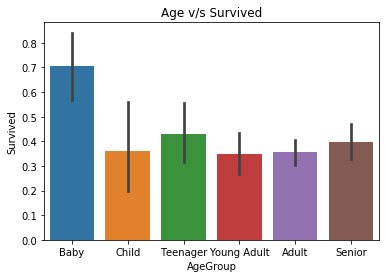

In [17]:
range1 = [0, 5, 12, 18, 24, 35, 60]
labels = ['Baby', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df['AgeGroup'] = pd.cut(df["Age"], range1, labels = labels)
ax2 = sns.barplot(x='AgeGroup', y='Survived', data=df)
ax2.set_title('Age v/s Survived')
ax2

In [18]:
df = df = df.drop('AgeGroup', axis=1)

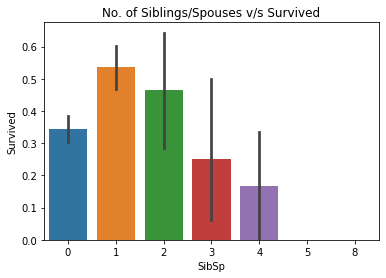

In [19]:
ax = sns.barplot(x='SibSp', y='Survived', data=df)
ax.set_title('No. of Siblings/Spouses v/s Survived')
ax

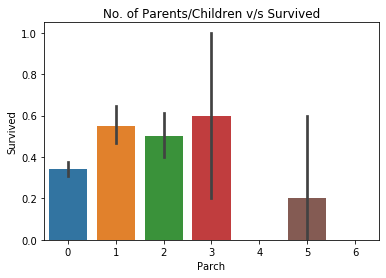

In [20]:
ax = sns.barplot(x='Parch', y='Survived', data=df)
ax.set_title('No. of Parents/Children v/s Survived')
ax

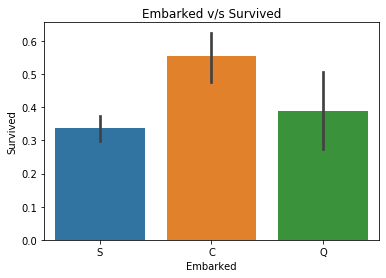

In [21]:
ax = sns.barplot(x='Embarked', y='Survived', data=df)
ax.set_title('Embarked v/s Survived')
ax

In [22]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['Sex']= labelEncoder.fit_transform(df['Sex'])
df['Embarked']= labelEncoder.fit_transform(df['Embarked'])

In [23]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


## Feature Selection

In [24]:
X = df.iloc[:, 1:8]
Y = df.iloc[:, 0]

In [25]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.feature_selection import VarianceThreshold

mdlsel = VarianceThreshold(threshold=0.5)
mdlsel.fit(X)
ix = mdlsel.get_support()
data1 = pd.DataFrame(mdlsel.transform(X), columns = X.columns.values[ix])
data1.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked
0,3.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,38.0,1.0,0.0,71.2833,0.0
2,3.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,35.0,1.0,0.0,53.1000,2.0
4,3.0,35.0,0.0,0.0,8.0500,2.0


In [27]:
from sklearn.feature_selection import SelectKBest, chi2

bestfeatures = SelectKBest(chi2, k = 5)
fit = bestfeatures.fit(X_train, Y_train)

In [28]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [29]:
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Specs','Score']

In [30]:
featureScores 

,Specs,Score
0,Pclass,22.651692
1,Sex,82.415412
2,Age,45.473701
3,SibSp,0.529343
4,Parch,10.356638
5,Fare,4054.492164
6,Embarked,10.002081


##### From the chi2 test, it can be observed that Fare,  Age, Sex and Pclass are the most important features for prediction.

## Model for prediction

In [31]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
364,3,1,28.0,1,0,15.5000,1
256,1,0,28.0,0,0,79.2000,0
477,3,1,29.0,1,0,7.0458,2
272,2,0,41.0,0,1,19.5000,2
554,3,0,22.0,0,0,7.7750,2
...,...,...,...,...,...,...,...
837,3,1,28.0,0,0,8.0500,2
193,2,1,3.0,1,1,26.0000,2
630,1,1,80.0,0,0,30.0000,2
560,3,1,28.0,0,0,7.7500,1


In [32]:
X_train = X_train.values

In [33]:
X_train

array([[ 3.    ,  1.    , 28.    , ...,  0.    , 15.5   ,  1.    ],
       [ 1.    ,  0.    , 28.    , ...,  0.    , 79.2   ,  0.    ],
       [ 3.    ,  1.    , 29.    , ...,  0.    ,  7.0458,  2.    ],
       ...,
       [ 1.    ,  1.    , 80.    , ...,  0.    , 30.    ,  2.    ],
       [ 3.    ,  1.    , 28.    , ...,  0.    ,  7.75  ,  1.    ],
       [ 2.    ,  1.    , 25.    , ...,  2.    , 41.5792,  0.    ]])

In [34]:
X_train.shape

(711, 7)

In [35]:
X_train = np.delete(X_train, [3, 4, 6], axis = 1)

In [36]:
X_train

array([[ 3.    ,  1.    , 28.    , 15.5   ],
       [ 1.    ,  0.    , 28.    , 79.2   ],
       [ 3.    ,  1.    , 29.    ,  7.0458],
       ...,
       [ 1.    ,  1.    , 80.    , 30.    ],
       [ 3.    ,  1.    , 28.    ,  7.75  ],
       [ 2.    ,  1.    , 25.    , 41.5792]])

In [37]:
X_test = np.delete(X_test.values, [3, 4, 6], axis = 1)

In [38]:
X_test

array([[  3.    ,   0.    ,  14.    ,   7.8542],
       [  3.    ,   1.    ,  28.    ,  69.55  ],
       [  1.    ,   0.    ,  36.    , 120.    ],
       [  1.    ,   1.    ,  36.    ,  78.85  ],
       [  3.    ,   0.    ,  63.    ,   9.5875],
       [  1.    ,   1.    ,  52.    ,  79.65  ],
       [  2.    ,   1.    ,  26.    ,  10.5   ],
       [  1.    ,   1.    ,  42.    ,  26.2875],
       [  3.    ,   0.    ,  30.    ,   8.6625],
       [  2.    ,   1.    ,   8.    ,  36.75  ],
       [  3.    ,   0.    ,  41.    ,  20.2125],
       [  1.    ,   0.    ,  28.    , 146.5208],
       [  3.    ,   0.    ,   0.75  ,  19.2583],
       [  2.    ,   1.    ,  19.    ,  36.75  ],
       [  3.    ,   0.    ,  28.    ,   7.75  ],
       [  3.    ,   1.    ,  25.    ,  17.8   ],
       [  2.    ,   0.    ,  34.    ,  23.    ],
       [  3.    ,   0.    ,  29.    ,  21.075 ],
       [  3.    ,   1.    ,  28.    ,  56.4958],
       [  1.    ,   0.    ,  18.    ,  79.65  ],
       [  1.    ,   

In [39]:
#Logistic Regression 

In [40]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)

LogisticRegression()

In [41]:
Y_pred = regressor.predict(X_test)

In [42]:
Y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [43]:
Y_test.values

array([0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1], dtype=int64)

In [44]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)

In [45]:
cm

array([[83, 22],
       [31, 42]], dtype=int64)

In [46]:
# Accuracy Score

from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test, Y_pred)

In [47]:
acc

0.702247191011236

In [48]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

DecisionTreeClassifier()

In [49]:
Y_pred1 = classifier.predict(X_test)

In [50]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(Y_test, Y_pred1)

In [51]:
cm1

array([[87, 18],
       [26, 47]], dtype=int64)

In [52]:
# Accuracy Score

from sklearn.metrics import accuracy_score
acc1 = accuracy_score(Y_test, Y_pred1)
acc1

0.7528089887640449

In [53]:
# RandomForest Classification
from sklearn.ensemble import RandomForestClassifier
randomClassifier = RandomForestClassifier()
randomClassifier.fit(X_train, Y_train)

RandomForestClassifier()

In [54]:
Y_pred2 = randomClassifier.predict(X_test)

In [55]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm2 = confusion_matrix(Y_test, Y_pred2)
cm2

array([[90, 15],
       [22, 51]], dtype=int64)

In [56]:
# Accuracy Score

from sklearn.metrics import accuracy_score
acc2 = accuracy_score(Y_test, Y_pred2)
acc2

0.7921348314606742

In [57]:
x_res = pd.DataFrame(X_test)
y_res = pd.DataFrame(Y_pred2)
result = pd.concat([x_res, y_res], axis = 1)
result.columns = ['PClass','Sex','Age','Fare','Survived']
result

,PClass,Sex,Age,Fare,Survived
0,3.0,0.0,14.0,7.8542,1
1,3.0,1.0,28.0,69.5500,0
2,1.0,0.0,36.0,120.0000,1
3,1.0,1.0,36.0,78.8500,1
4,3.0,0.0,63.0,9.5875,0
...,...,...,...,...,...
173,2.0,1.0,27.0,13.0000,0
174,2.0,1.0,31.0,13.0000,0
175,3.0,1.0,9.0,31.3875,0
176,1.0,1.0,32.0,30.5000,0


In [58]:
# MinMaxScaling Scaling

from sklearn.preprocessing import MinMaxScaler
norm_X1 = MinMaxScaler()
X_train = norm_X1.fit_transform(X_train)
norm_X2 = MinMaxScaler()
X_test = norm_X2.fit_transform(X_test)

In [59]:
# KNN Classification

from sklearn.neighbors import KNeighborsClassifier
kClassifier = KNeighborsClassifier(n_neighbors = 14, metric = 'euclidean')
kClassifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=14)

In [60]:
Y_pred3 = kClassifier.predict(X_test)

In [61]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
cm3 = confusion_matrix(Y_test, Y_pred3)
cm3

array([[97,  8],
       [37, 36]], dtype=int64)

In [62]:
# Accuracy Score

from sklearn.metrics import accuracy_score
acc3 = accuracy_score(Y_test, Y_pred3)
acc3

0.7471910112359551

# Conclusion

#### RandomForest Classifier gives best prediciton among the classification models followed by Decision Tree having 0.79% and 0.75% accuracy respectively.